In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops


In [2]:
import pandas as pd

In [3]:
#classes=pd.read_csv("trainLabels.csv")

In [4]:
#classes.head()

In [5]:
from keras.datasets import cifar100


Using TensorFlow backend.


In [6]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
#num_train, img_channels, img_rows, img_cols =  train_features.shape
#num_test, _, _, _ =  test_features.shape
#num_classes = len(np.unique(train_labels))

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train

array([[19],
       [29],
       [ 0],
       ..., 
       [ 3],
       [ 7],
       [73]])

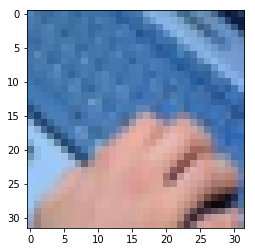

In [10]:
index = 10
plt.imshow(X_train[index])
plt.show()

In [11]:
X_train = X_train/255.
X_test = X_test/255.


In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_train.dtype

dtype('float64')

In [14]:
%matplotlib inline
np.random.seed(1)

In [15]:
#TensorFlow requires that you create placeholders for the input data that will be fed into the model when running the session.
def create_placeholder(n_h,n_w,n_c,label):
    
    X=tf.placeholder(tf.float32,shape=(None,n_h,n_w,n_c))
    Y=tf.placeholder(tf.float32,shape=(None,label))
    
    return X,Y
    

In [16]:
X, Y = create_placeholder(32, 32, 3, 100)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 100), dtype=float32)


In [17]:
def initialize_weight():
    #    Initializes weight parameters to build a neural network with tensorflow.
    tf.set_random_seed(1)
    
    w1=tf.get_variable("w1",[5,5,3,20],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w2=tf.get_variable("w2",[5,5,20,20],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w3=tf.get_variable("w3",[5,5,20,20],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w4=tf.get_variable("w4",[5,5,20,20],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w5=tf.get_variable("w5",[5,5,20,20],initializer=tf.contrib.layers.xavier_initializer(seed=0))



    parameters={"w1":w1,
                "w2":w2, 
                "w3":w3,
                "w4":w4,
                 "w5":w5}
    
    return parameters

In [18]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters=initialize_weight()
    sess.run(tf.global_variables_initializer())
    print("w1 = " + str(parameters["w1"].eval()[1,1,1]))
    print("w2 = " + str(parameters["w2"].eval()[1,1,1]))
    print("w3 = " + str(parameters["w3"].eval()[1,1,1]))
    print("w4 = " + str(parameters["w4"].eval()[1,1,1]))
    print("w5 = " + str(parameters["w5"].eval()[1,1,1]))




w1 = [-0.09227955  0.01970217 -0.01005384 -0.09455211 -0.07511778 -0.02913931
 -0.0081874  -0.05044512 -0.10122246 -0.02417627 -0.09030078 -0.04440387
  0.02245919 -0.09806493  0.04956377  0.02185374  0.07320614  0.042335
  0.06336805 -0.10107009]
w2 = [ 0.00076752  0.07216509 -0.04682332  0.07209965  0.0732206  -0.02780577
 -0.03912907  0.0036763   0.07563546 -0.02299793 -0.01903649 -0.05896062
  0.06914204  0.03984906 -0.0356699   0.07500588  0.02960422 -0.06865672
 -0.06381108 -0.05951216]
w3 = [ 0.00076752  0.07216509 -0.04682332  0.07209965  0.0732206  -0.02780577
 -0.03912907  0.0036763   0.07563546 -0.02299793 -0.01903649 -0.05896062
  0.06914204  0.03984906 -0.0356699   0.07500588  0.02960422 -0.06865672
 -0.06381108 -0.05951216]
w4 = [ 0.00076752  0.07216509 -0.04682332  0.07209965  0.0732206  -0.02780577
 -0.03912907  0.0036763   0.07563546 -0.02299793 -0.01903649 -0.05896062
  0.06914204  0.03984906 -0.0356699   0.07500588  0.02960422 -0.06865672
 -0.06381108 -0.05951216]
w5

In [19]:
def forward_prop(X,parameters):
    
        

    # Retrieve the parameters from the dictionary "parameters" 
    w1 = parameters['w1']
    w2 = parameters['w2']
    w3 = parameters['w3']
    w4 = parameters['w4']
    w5 = parameters['w5']
    
    ### START CODE HERE ###     
    #CONV2D: stride of 1
    z1=tf.nn.conv2d(X,w1,strides=[1,1,1,1],padding="VALID")
    #Relu
    a1=tf.nn.relu(z1)
    # MAXPOOL: window 2x2, stride 2
    p1=tf.nn.max_pool(a1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    # CONV2D: filters w2, stride 1
    z2=tf.nn.conv2d(p1,w2,strides=[1,1,1,1],padding="SAME")
    #Relu
    a2=tf.nn.relu(z2)
    #MAXPOOL: window 2x2, stride 2 
    p2=tf.nn.max_pool(a2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    # CONV2D: filters W3, stride 1
    z3=tf.nn.conv2d(p2,w3,strides=[1,1,1,1],padding="SAME")
    #Relu
    a3=tf.nn.relu(z3)
    #MAXPOOL: window 2x2, stride 2
    p3=tf.nn.max_pool(a3,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    # CONV2D: filters W4, stride 1
    z4=tf.nn.conv2d(p3,w4,strides=[1,1,1,1],padding="SAME")
    #Relu
    a4=tf.nn.relu(z4)
    #MAXPOOL: window 2x2, stride 2 
    p4=tf.nn.max_pool(a4,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    # CONV2D: filters W5, stride 1
    z5=tf.nn.conv2d(p4,w5,strides=[1,1,1,1],padding="SAME")
    #Relu
    a5=tf.nn.relu(z5)
    #MAXPOOL: window 2x2, stride 2 
    p5=tf.nn.max_pool(a5,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    # FLATTEN
    p5 = tf.contrib.layers.flatten(p5)
    # FULLY-CONNECTED Layer 1
    fc1 = tf.contrib.layers.fully_connected(p5, 100, activation_fn=tf.nn.relu)
    # FULLY-CONNECTED Layer 2
    fc2 = tf.contrib.layers.fully_connected(fc1,100,activation_fn=tf.nn.relu)
    # FULLY-CONNECTED Hash layer creating 48 bit binary hash code
    hashlayer=tf.contrib.layers.fully_connected(fc2,48,activation_fn=tf.nn.sigmoid)
    bn=tf.divide(tf.add(tf.sign(tf.subtract(hashlayer,0.5)),1),2)
    ### END CODE HERE ###
    #print (type(bn))
    return bn,fc2

    
   
   


In [20]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholder(32, 32, 3, 100)
    parameters = initialize_weight()
    h,z3 = forward_prop(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(h, {X: np.random.randn(4,32,32,3), Y: np.random.randn(4,100)})
    print("h = " + str(a))

h = [[ 1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.
   1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.
   1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.
   1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.
   1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.
   1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.
   1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.
   1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.]]


In [21]:
print (z3)

Tensor("fully_connected_1/Relu:0", shape=(?, 100), dtype=float32)


In [22]:
def compute_cost(z3, Y):
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax(logits=z3, name=None))
    ### END CODE HERE ###
    
    return cost

In [23]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholder(32, 32, 3, 100)
    parameters = initialize_weight()
    h,z3 = forward_prop(X, parameters)
    cost = compute_cost(z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(1,32,32,3), Y: np.random.randn(1,100)})
    print("cost = " + str(a))

cost = 0.01


In [ ]:
hash_input=[]
batchsize=10000
num_epochs=1
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,print_cost = True):
        
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_h, n_w, n_c) = X_train.shape             
    label = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholder(n_h, n_w, n_c, label)

    # Initialize parameters
    parameters = initialize_weight()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    h,z3 = forward_prop(X, parameters)
    hash_input.append(h)

    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / batchsize) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            for index, offset in enumerate(range(0, len(X_train), batchsize)):
                batch_x, batch_y = X_train[offset: offset + batchsize], Y_train[offset: offset + batchsize]
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
            
            minibatch_cost += temp_cost / num_minibatches
         # Print the cost every epoch
        if print_cost == True and epoch % 5 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
        if print_cost == True and epoch % 1 == 0:
            costs.append(minibatch_cost)
            
       # plot the cost
        #plt.plot(np.squeeze(costs))
        #plt.ylabel('cost')
        #plt.xlabel('iterations (per tens)')
        #plt.title("Learning rate =" + str(learning_rate))
        #plt.show()
        
        #Calculate the correct predictions
        predict_op = tf.argmax(z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        return parameters,hash_input

            
            

            

In [ ]:
parameters,hash_input=model(X_train, y_train, X_test, y_test,0.09,True)

In [ ]:
hash_input.shape